importo los numeros pseudo aleatorios


In [1]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog




# Ocultar la ventana principal de tkinter
root = tk.Tk()
root.withdraw()

import pandas as pd

file_path = input("Introduce la ruta del archivo CSV de números pseudoaleatorios: ")
df = pd.read_csv(file_path)

global numeros_pseudoaletorios
numeros_pseudoaletorios = df["N-pseudoaletorios-Normalisados"].values
numeros = numeros_pseudoaletorios


creamos la funcione papa valores de las variables

In [2]:
#MOCKUP HARDCODEADO FALTA DEFINIR LA FUNCION QUE GENERA LOS ARRIVOS
from scipy.stats import norm

def generar_intevalo_arribos(numero_aleatorio):
    """
    Genera una lista de n números pseudoaleatorios a partir de un número dado.
    """
    tiempo = norm.ppf(numero_aleatorio, 13.5, 2.86)
    
    return tiempo
    

In [3]:

from scipy.stats import norm

def generar_tiempo_indicacion(numero_pseudoaleatorio):
    """
    Genera un tiempo de indicacion aleatorio basado en los números pseudoaleatorios normalizados.
    """
    tiempo = norm.ppf(numero_pseudoaleatorio, 51.7, 21.1)
    return tiempo / 60  # Convertir a minutos


In [4]:
def generar_tiempo_rutina(numero_pseudoaleatorio):
    """
    Genera un tiempo de rutina aleatorio basado en los números pseudoaleatorios normalizados.
    """
    tiempo = 10.28 + 18.17 * numero_pseudoaleatorio 

    return tiempo 

SIMULACIOM

In [15]:
def simular_dia_tiempo_espera(cantidad_personas):
    global numeros_pseudoaletorios

    lista_eventos = []
    for i in range(cantidad_personas):
  
        #persona = tiempo_arribo
        persona = 0
        lista_eventos.append(persona)

    
    # arracar simulación
    tiempo = 0 
    tiempo_final = 240  # 4 horas en minutos
    tiempo_entrenador = 0
    tiempo_espera_total = 0
    N  =    0

    cant_n = len(numeros_pseudoaletorios)
    while tiempo < tiempo_final and cant_n > 4:
        
        # Ordenar eventos por tiempo de arribo
        lista_eventos.sort()
        
        # Tomar el primer evento
        
        tiempo = lista_eventos.pop(0)

        if tiempo >= tiempo_entrenador:

            tiempo_inicio_atencion = tiempo

            tiempo_de_espera = 0

        else:
            tiempo_de_espera = tiempo_entrenador - tiempo

            tiempo_inicio_atencion = tiempo_entrenador

        tiempo_espera_total += tiempo_de_espera

        N += 1

        tiempo_indicacion = generar_tiempo_indicacion(numeros_pseudoaletorios[0])
        numeros_pseudoaletorios  = numeros_pseudoaletorios [1:]  # Eliminar el primer
        tiempo_entrenador = tiempo_indicacion + tiempo_inicio_atencion
        tiempo_rutina = generar_tiempo_rutina(numeros_pseudoaletorios[0])
        numeros_pseudoaletorios = numeros_pseudoaletorios[1:]  # Eliminar el primer

        
        prox_tiempo = tiempo + tiempo_de_espera + tiempo_indicacion + tiempo_rutina 
        lista_eventos.append(prox_tiempo)

        cant_n = len(numeros_pseudoaletorios)
            
    # print(f"Tiempo de espera total: {tiempo_espera_total} minutos")
    # print(f"Número de personas atendidas: {N}")
    # print(f"Tiempo promedio de espera: {tiempo_espera_total/N} minutos")

    return tiempo_espera_total / N

    

In [31]:
#simular
espera_total = 0
replicas = 50
variable_control = 15

resultados = []  # Lista para almacenar los resultados

for i in range(replicas):
    promedio_espera_dia = simular_dia_tiempo_espera(variable_control)
    espera_total += promedio_espera_dia

    #Preparo para copiar y pegar en excel
    segundos = promedio_espera_dia * 60
    espera_promedio_str = f"{segundos:.2f}".replace('.', ',')
    resultados.append((i + 1, espera_promedio_str))  # Guardar número de corrida y tiempo


# Imprimir el tiempo promedio de espera
espera_promedio = (espera_total / replicas)*60
print("Simulacion de 50 corridas de 4 horas con ", variable_control, " personas en el gimnasio  ")
print(f"Tiempo promedio de espera: {espera_promedio} segundos")

from scipy.stats import shapiro

# Extraer los valores de espera promedio y convertirlos a float (reemplazando la coma por punto)
esperas = [float(valor.replace(',', '.')) for _, valor in resultados]

# Prueba de normalidad de Shapiro-Wilk
stat, p = shapiro(esperas)
#print(f"Estadístico = {stat}, p-valor = {p}")

if p > 0.05:
    print("La distribución parece normal (no se rechaza H0)")
else:
    print("No parece una distribución normal (se rechaza H0)")

df_resultados = pd.DataFrame(resultados, columns=["Corrida", "Tiempo de espera promedio (segundos)"])
print(df_resultados.to_string(index=False))


print("Listado de tiempos de espera promedio (segundos):")
for valor in esperas:
    print(valor)

Simulacion de 50 corridas de 4 horas con  15  personas en el gimnasio  
Tiempo promedio de espera: 62.54828311030543 segundos
La distribución parece normal (no se rechaza H0)
 Corrida Tiempo de espera promedio (segundos)
       1                                62,91
       2                                63,17
       3                                53,80
       4                                55,51
       5                                68,58
       6                                68,66
       7                                75,78
       8                                72,82
       9                                61,42
      10                                54,16
      11                                64,80
      12                                69,23
      13                                61,35
      14                                67,93
      15                                60,67
      16                                59,45
      17                                61,

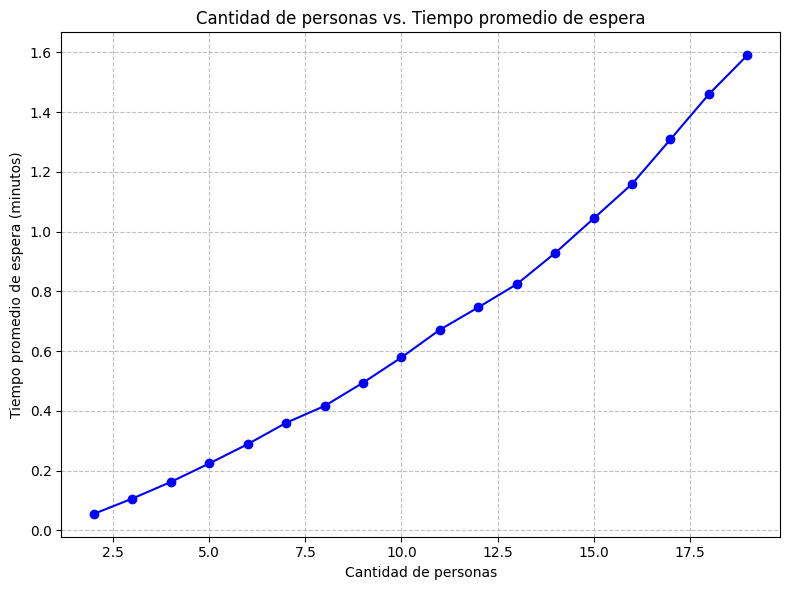

In [50]:
import matplotlib.pyplot as plt
import numpy as np

personas_range = range(2, 20)
promedios_espera = []

for i in personas_range:
    tiempos_espera = []
    for j in range(100):  # Puedes aumentar el número de simulaciones para mayor precisión
        tiempo_espera = simular_dia_tiempo_espera(i)
        tiempos_espera.append(tiempo_espera)
    promedio = np.mean(tiempos_espera)
    promedios_espera.append(promedio)

plt.figure(figsize=(8, 6))
plt.plot(personas_range, promedios_espera, marker='o', color='blue')
plt.title('Cantidad de personas vs. Tiempo promedio de espera')
plt.xlabel('Cantidad de personas')
plt.ylabel('Tiempo promedio de espera (minutos)')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()